In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset.csv', header=1)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
# Index 122 & 123 needs to be deleted

df.loc[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire


In [5]:
df.drop(df.iloc[122:124].index, axis=0, inplace=True)
df = df.reset_index(drop=True)

In [6]:
df.iloc[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire


In [7]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [8]:
# Columns - ' RH', ' Ws', 'Rain ' & 'Classes  ' have extra space in their name

df.columns = df.columns.str.replace(" ","")

In [9]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [10]:
def detail_info():
    temp_df = pd.DataFrame(index= df.columns)
    
    temp_df['data_type'] = df.dtypes
    temp_df['unique_val'] = df.nunique()
    temp_df['duplicate_val'] = df.duplicated().sum()
    temp_df['missing_val'] = df.isnull().sum()
    temp_df['missing_val_%'] = round(df.isnull().mean()*100,2)
    
    return temp_df

In [11]:
detail_info()

,data_type,unique_val,duplicate_val,missing_val,missing_val_%
day,object,31,0,0,0.00
month,object,4,0,0,0.00
year,object,1,0,0,0.00
Temperature,object,19,0,0,0.00
RH,object,62,0,0,0.00
Ws,object,18,0,0,0.00
Rain,object,39,0,0,0.00
FFMC,object,173,0,0,0.00
DMC,object,166,0,0,0.00
DC,object,198,0,0,0.00


In [12]:
# Output class-'Classess' should have binary output as 'Fire' or 'Not Fire' but it is showing 8
# Output class-'Classess' has one missing value

In [13]:
df.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [14]:
# Let's remove extra white spaces from each column

for feature in df.columns:
    df[feature]= df[feature].str.strip()

In [15]:
df.Classes.unique()    

array(['not fire', 'fire', nan], dtype=object)

### Handling Missing values

In [16]:
# Find the missing value columns along with its number of missing values

for feature in df.columns:
    if df[feature].isnull().sum()>0:
        print(feature, df[feature].isnull().sum(), round((df[feature].isnull().mean()*100),2))
    

Classes 1 0.41


In [17]:
# Find the row which has missing value

df[df['Classes'].isnull()==True]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [18]:
# Let's see the dataframe for nearby index of 165
# It seems that 'DC' column has aggregated the value of 'ISI' column which resulted displacement of rest of the values of row
# let's handle it instead of deleting row, as we have very few data points in our dataset

df.loc[162:168]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
162,11,07,2012,34,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,not fire
163,12,07,2012,36,44,13,0,90.1,12.6,19.4,8.3,12.5,9.6,fire
164,13,07,2012,39,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,fire
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN
166,15,07,2012,34,45,17,0,90.5,18,24.1,10.9,17.7,14.1,fire
167,16,07,2012,31,83,17,0,84.5,19.4,33.1,4.7,19.2,7.3,fire
168,17,07,2012,32,81,17,0,84.6,21.1,42.3,4.7,20.9,7.7,fire


In [19]:
df['Classes'].iloc[165] = df['FWI'].iloc[165]
df['FWI'].iloc[165] = df['BUI'].iloc[165]
df['BUI'].iloc[165] = df['ISI'].iloc[165]
df['ISI'].iloc[165] = df['DC'].iloc[165].split(' ')[1].strip()
df['DC'].iloc[165] = df['DC'].iloc[165].split(' ')[0].strip()

In [20]:
df.iloc[162:168]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
162,11,07,2012,34,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,not fire
163,12,07,2012,36,44,13,0,90.1,12.6,19.4,8.3,12.5,9.6,fire
164,13,07,2012,39,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,fire
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6,9,12.5,10.4,fire
166,15,07,2012,34,45,17,0,90.5,18,24.1,10.9,17.7,14.1,fire
167,16,07,2012,31,83,17,0,84.5,19.4,33.1,4.7,19.2,7.3,fire


In [21]:
detail_info()

,data_type,unique_val,duplicate_val,missing_val,missing_val_%
day,object,31,0,0,0.0
month,object,4,0,0,0.0
year,object,1,0,0,0.0
Temperature,object,19,0,0,0.0
RH,object,62,0,0,0.0
Ws,object,18,0,0,0.0
Rain,object,39,0,0,0.0
FFMC,object,173,0,0,0.0
DMC,object,166,0,0,0.0
DC,object,198,0,0,0.0


In [22]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [23]:
# Lets change the dataypes:

for feature in ['day', 'month', 'year']:
    df[feature]= df[feature].astype('int64') 

for feature in ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']:
    df[feature]= df[feature].astype('float64')
  

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
day            244 non-null int64
month          244 non-null int64
year           244 non-null int64
Temperature    244 non-null float64
RH             244 non-null float64
Ws             244 non-null float64
Rain           244 non-null float64
FFMC           244 non-null float64
DMC            244 non-null float64
DC             244 non-null float64
ISI            244 non-null float64
BUI            244 non-null float64
FWI            244 non-null float64
Classes        244 non-null object
dtypes: float64(10), int64(3), object(1)
memory usage: 26.8+ KB


In [25]:
# Method # 1

df['Region'] = [str('Bejaia') if x<=121 else str('Sidi-Bel Abbes') for x in range(df.shape[0])]

In [26]:
# Method # 2

#df.loc[:122, 'Region'] = 'Bejaia'
#df.loc[122:, 'Region'] = 'Sidi-Bel Abbes'

In [27]:
df.iloc[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,9,2012,26.0,80.0,16.0,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,Bejaia
121,30,9,2012,25.0,78.0,14.0,1.4,45.0,1.9,7.5,0.2,2.4,0.1,not fire,Bejaia
122,1,6,2012,32.0,71.0,12.0,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,Sidi-Bel Abbes
123,2,6,2012,30.0,73.0,13.0,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,Sidi-Bel Abbes
124,3,6,2012,29.0,80.0,14.0,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,Sidi-Bel Abbes


In [28]:
df['date'] = pd.to_datetime(df[['day', 'month', 'year']])

In [29]:
df['day_name'] = df['date'].dt.day_name().str[0:3]

In [30]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date,day_name
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia,2012-06-01,Fri
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia,2012-06-02,Sat
2,3,6,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia,2012-06-03,Sun
3,4,6,2012,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia,2012-06-04,Mon
4,5,6,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia,2012-06-05,Tue


In [31]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region', 'date',
       'day_name'],
      dtype='object')

In [32]:
df = df.reindex(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI',
                 'FWI', 'Region', 'date', 'day_name','Classes'], axis =1)

In [33]:
df.to_excel('Cleaned-Algerian Forest Fire Dataset.xlsx', index= None)


### Visualisation

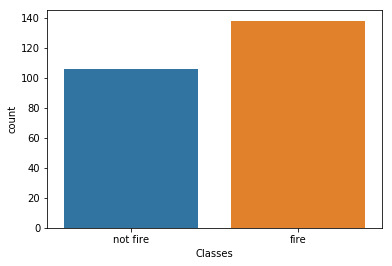

In [34]:
# First of all lets see output class is balanced or not

sns.countplot(df.Classes)

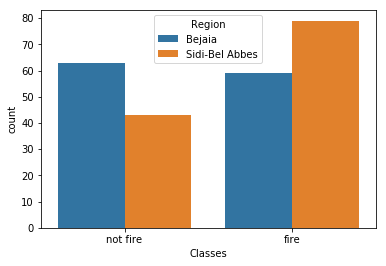

In [35]:
sns.countplot(x = df.Classes, hue = df.Region)

# 'Sid-Bei Abbes' region has more numbers of fire incidents than 'Bejaia' region

In [36]:
group1 = df.groupby(['Region','Classes']).agg({'Classes':['count']})

cm = sns.dark_palette("red", as_cmap=True)
group1.style.background_gradient(cmap=cm)

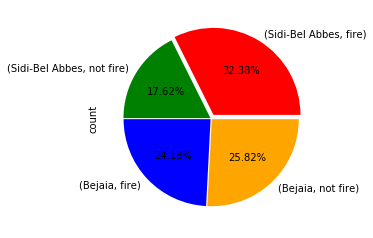

In [37]:
colors = ['blue', 'orange', 'red','green']
explode = (0.01,0.01,0.05,0.01)

group1.plot(kind='pie', y='Classes', autopct='%1.2f%%', colors=colors, explode=explode, startangle=180, legend=None)
plt.show()

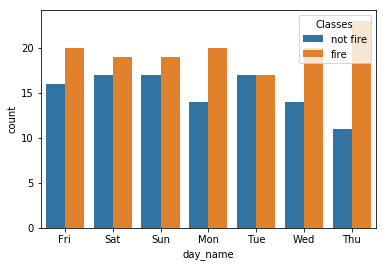

In [38]:
sns.countplot(x = df.day_name, hue = df.Classes)

# Most of the fire incidents occured on Thursday
# Minimum fire incidents occured on Tuesday

In [39]:
pivot1 = pd.pivot_table(df, index=['Classes','day_name'], aggfunc={'Classes':len})

cm = sns.light_palette("red", as_cmap=True)
pivot1.style.background_gradient(cmap=cm)

# Thursday has 23 numbers of fire incidents (Maximum)
# Tuesday has 17 numbers of fire incidents (Minimum)

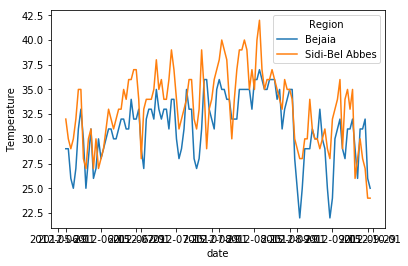

In [40]:
sns.lineplot(x='date', y='Temperature', hue='Region', data=df)

# 'Sid-Bei Abbes' region is hotter than 'Bejaia' region

In [41]:
temp_col = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region', 'day_name']

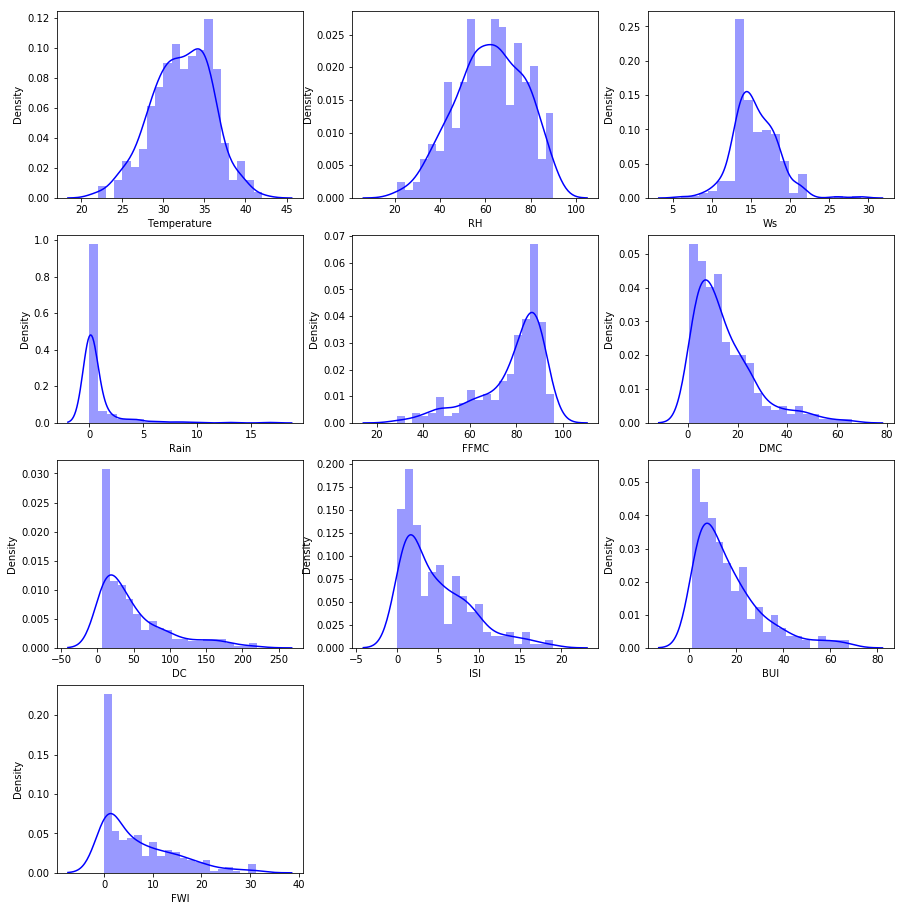

In [42]:
plt.figure(figsize=(15,20))
for enum, feature in enumerate(temp_col):
    if feature not in ['Region', 'day_name']:        
        plt.subplot(5, 3, enum+1)
        sns.distplot(df[feature], color='b', bins =20)
        plt.xlabel(feature)
        plt.show

In [43]:
# Temprature, RH and WS follows somewhat Normal Distribution
# FMMC is Left skewed
# Rain, DMC, DC, ISI, BUI and FWI are Right skewed (follows Log-Normal distribution)

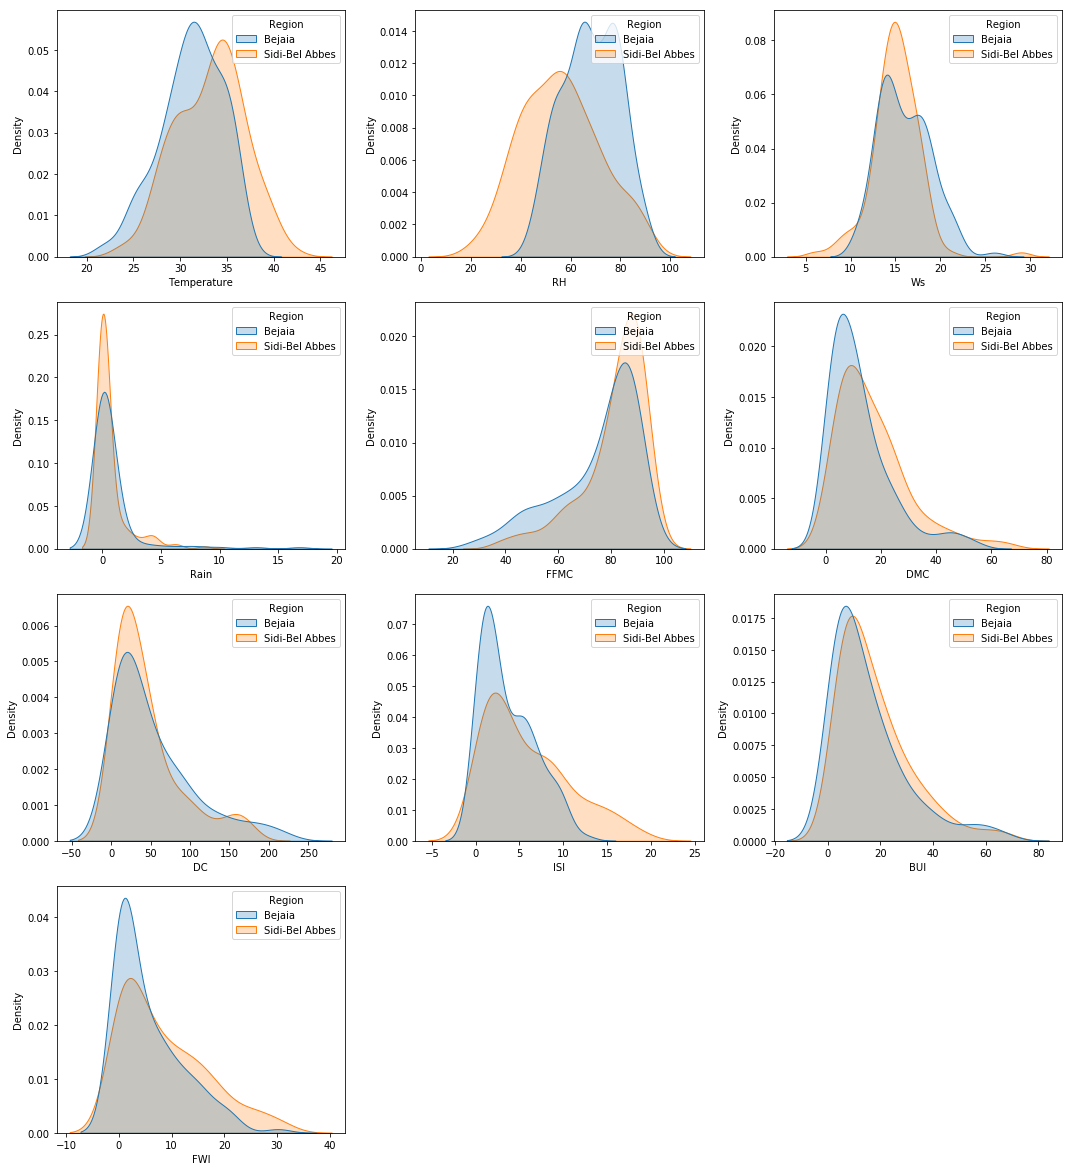

In [44]:
plt.figure(figsize=(15,20))
for enum, feature in enumerate(temp_col):
    if feature not in ['Region', 'day_name']:  
        plt.subplot(5, 3, enum+1)
        sns.kdeplot(df[feature], shade=True, hue='Region', data=df)
        plt.xlabel(feature)
        plt.tight_layout()

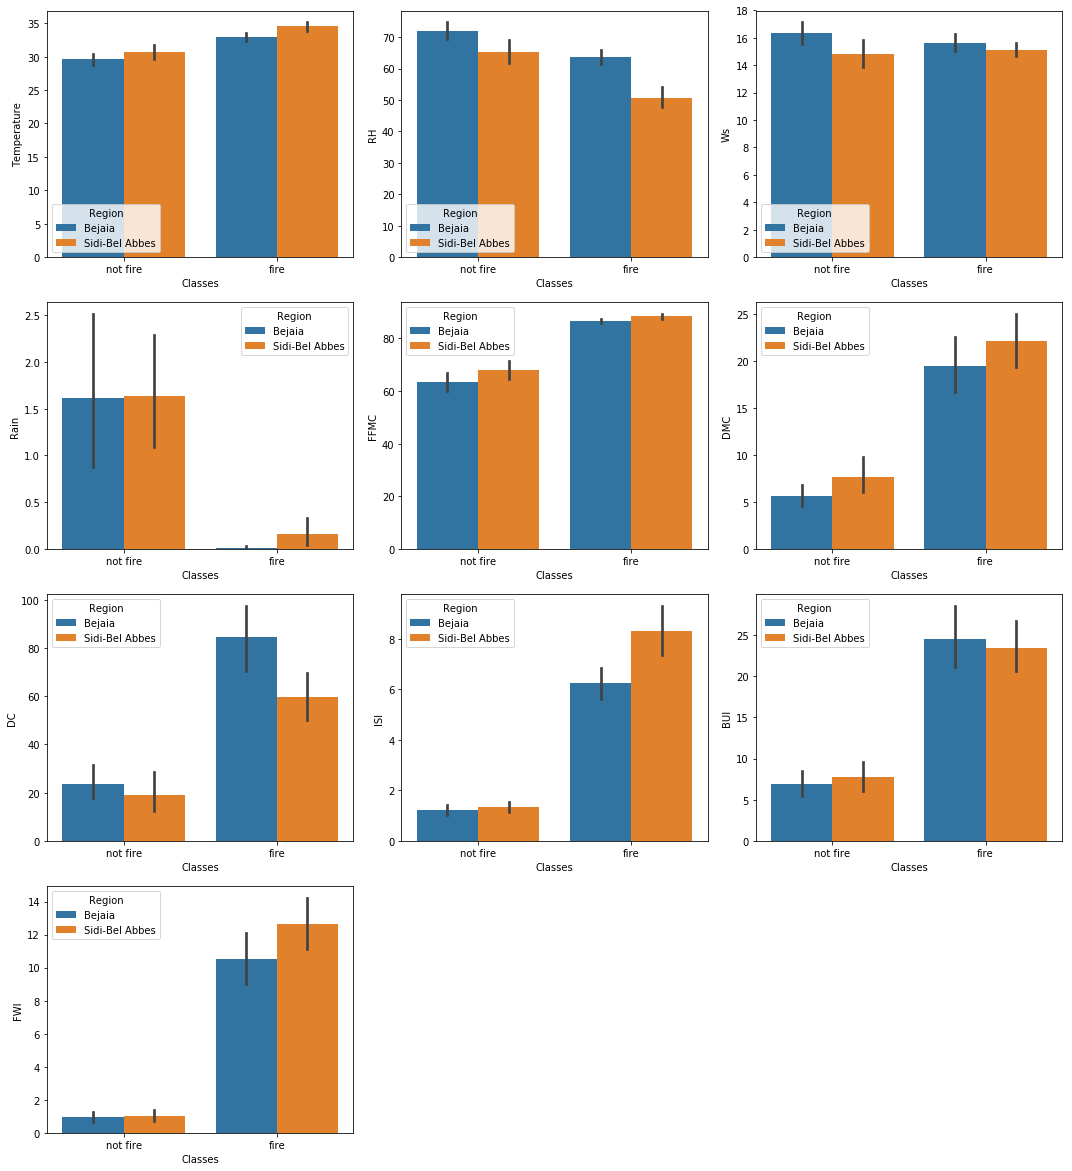

In [45]:
plt.figure(figsize=(15, 20))
for enum, feature in enumerate(temp_col):
    if feature not in ['Region', 'day_name']:  
        plt.subplot(5, 3, enum+1)
        sns.barplot(x='Classes', y=df[feature], hue = df['Region'], data=df)
        plt.tight_layout()
    

In [46]:
# Lower the rain higher the incidents of fire
# Higher the DMC, DC, ISI, BUI and FWI higher the incidents of fire
# range can be viewed using stripplot below

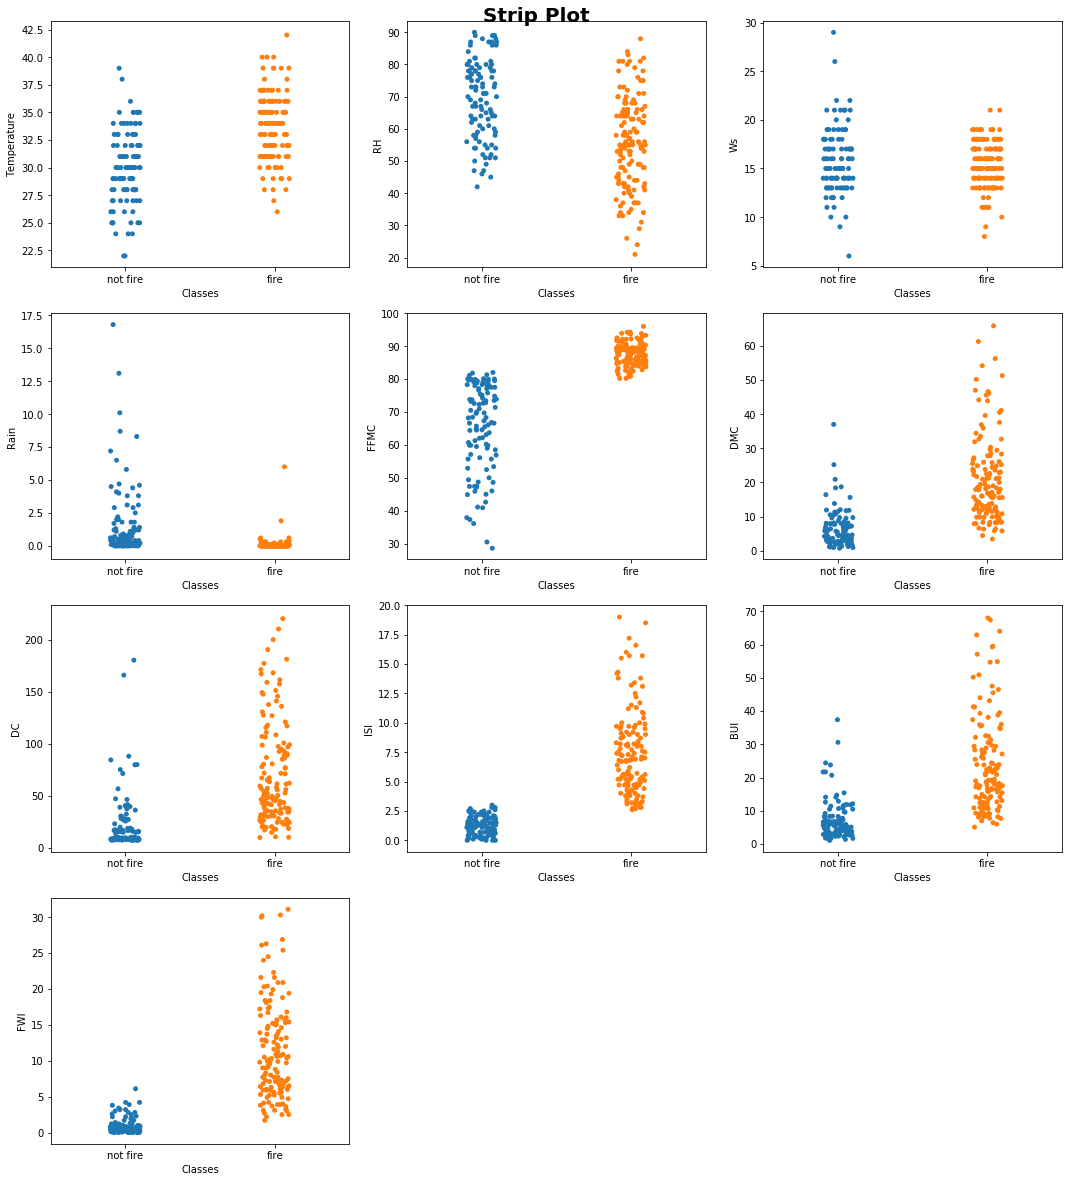

In [47]:
plt.figure(figsize=(15, 20))
plt.suptitle('Strip Plot', fontsize=20, fontweight='bold', alpha=1, y=1)

for enum, feature in enumerate(temp_col):
    if feature not in ['Region', 'day_name']:   
        plt.subplot(5,3, enum+1)
        sns.stripplot(x='Classes', y=df[feature] , data=df)
        plt.tight_layout()

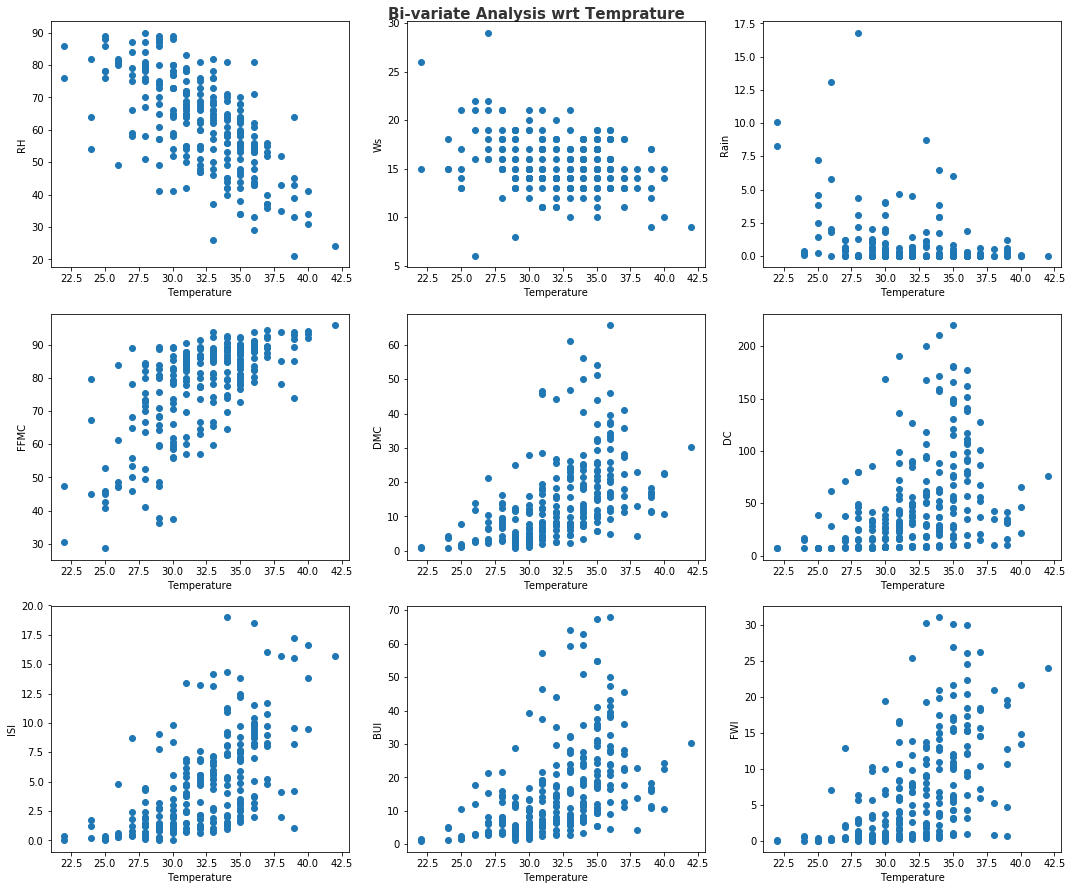

In [48]:
plt.figure(figsize=(15,20))
plt.suptitle('Bi-variate Analysis wrt Temprature', fontsize=15, fontweight='bold', alpha=0.8, y=1.0)

for i in range(len(temp_col)):   
    if temp_col[i] not in ['Temperature','Region', 'day_name']:  
        plt.subplot(5, 3, i)
        plt.scatter(df['Temperature'], df[temp_col[i]])
        plt.xlabel('Temperature')
        plt.ylabel(temp_col[i])
        plt.tight_layout()

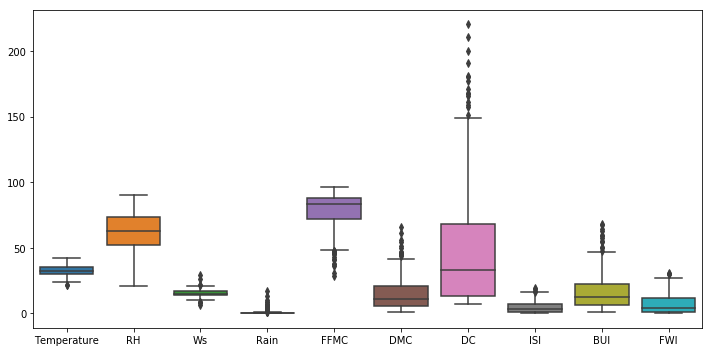

In [49]:
fig = plt.figure( figsize=(10,5))
sns.boxplot(orient='v', data=df[temp_col])
plt.tight_layout()

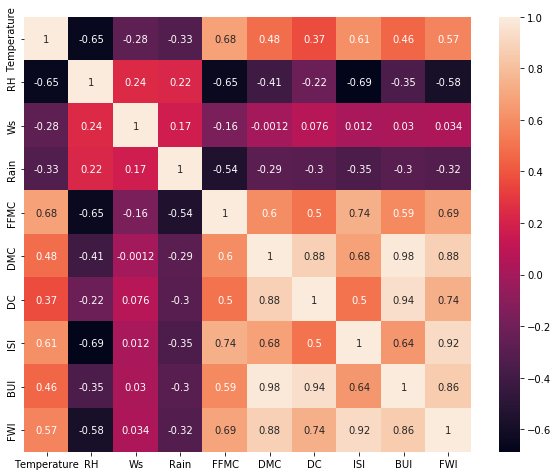

In [50]:
plt.figure(figsize = (10,8))
sns.heatmap(df[temp_col].corr(), annot = True)

In [51]:
# BUI is correlated DMC and DC
# FWI is correlated ISI

In [52]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region', 'date', 'day_name',
       'Classes'],
      dtype='object')

In [53]:
data = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region', 'Classes']]

In [54]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,Bejaia,not fire
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,Bejaia,not fire
2,3,6,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,Bejaia,not fire
3,4,6,2012,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,Bejaia,not fire
4,5,6,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,Bejaia,not fire


In [55]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Region'] = label_encoder.fit_transform(data['Region'])
data['Classes'] = label_encoder.fit_transform(data['Classes'])

In [56]:
data.head()

# Note:
# 'Bejaia' is 0 and 'Sidi-Bel Abbes' is 1
# 'Fire' is 0 and 'Not Fire' is 1

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [57]:
data.Region.value_counts()

1    122
0    122
Name: Region, dtype: int64

In [58]:
data.Classes.value_counts()

0    138
1    106
Name: Classes, dtype: int64

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
day            244 non-null int64
month          244 non-null int64
year           244 non-null int64
Temperature    244 non-null float64
RH             244 non-null float64
Ws             244 non-null float64
Rain           244 non-null float64
FFMC           244 non-null float64
DMC            244 non-null float64
DC             244 non-null float64
ISI            244 non-null float64
BUI            244 non-null float64
FWI            244 non-null float64
Region         244 non-null int32
Classes        244 non-null int32
dtypes: float64(10), int32(2), int64(3)
memory usage: 26.8 KB


In [60]:
for feature in data.columns[:-1]:
    data[feature]= data[feature].astype('float64')

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
day            244 non-null float64
month          244 non-null float64
year           244 non-null float64
Temperature    244 non-null float64
RH             244 non-null float64
Ws             244 non-null float64
Rain           244 non-null float64
FFMC           244 non-null float64
DMC            244 non-null float64
DC             244 non-null float64
ISI            244 non-null float64
BUI            244 non-null float64
FWI            244 non-null float64
Region         244 non-null float64
Classes        244 non-null int32
dtypes: float64(14), int32(1)
memory usage: 27.7 KB


In [62]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,1
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,1
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,1
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,1
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,1


In [63]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [64]:
X.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0


In [65]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Classes, dtype: int32

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [67]:
X_train

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
228,15.0,9.0,2012.0,32.0,51.0,13.0,0.0,88.7,16.0,50.2,6.9,17.8,9.8,1.0
208,26.0,8.0,2012.0,33.0,37.0,16.0,0.0,92.2,61.3,167.2,13.1,64.0,30.3,1.0
96,5.0,9.0,2012.0,29.0,75.0,16.0,0.0,80.8,3.4,24.0,2.8,5.1,1.7,0.0
167,16.0,7.0,2012.0,31.0,83.0,17.0,0.0,84.5,19.4,33.1,4.7,19.2,7.3,1.0
84,24.0,8.0,2012.0,34.0,64.0,14.0,0.0,88.9,40.5,171.3,9.0,50.9,20.9,0.0
55,26.0,7.0,2012.0,36.0,53.0,19.0,0.0,89.2,17.1,98.6,10.0,23.9,15.3,0.0
86,26.0,8.0,2012.0,31.0,78.0,18.0,0.0,85.8,45.6,190.6,4.7,57.1,13.7,0.0
172,21.0,7.0,2012.0,36.0,29.0,18.0,0.0,93.9,39.6,80.6,18.5,39.5,30.0,1.0
242,29.0,9.0,2012.0,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1.0
152,1.0,7.0,2012.0,28.0,58.0,18.0,2.2,63.7,3.2,8.5,1.2,3.3,0.5,1.0


In [68]:
X_test

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
24,25.0,6.0,2012.0,31.0,64.0,15.0,0.0,86.7,14.2,63.8,5.7,18.3,8.4,0.0
6,7.0,6.0,2012.0,33.0,54.0,13.0,0.0,88.2,9.9,30.5,6.4,10.9,7.2,0.0
153,2.0,7.0,2012.0,33.0,48.0,16.0,0.0,87.6,7.9,17.8,6.8,7.8,6.4,1.0
211,29.0,8.0,2012.0,35.0,53.0,17.0,0.5,80.2,20.7,149.2,2.7,30.6,5.9,1.0
198,16.0,8.0,2012.0,40.0,41.0,10.0,0.1,92.0,22.6,65.1,9.5,24.2,14.8,1.0
176,25.0,7.0,2012.0,39.0,64.0,9.0,1.2,73.8,11.7,15.9,1.1,11.4,0.7,1.0
192,10.0,8.0,2012.0,39.0,39.0,15.0,0.2,89.3,15.8,35.4,8.2,15.8,10.7,1.0
124,3.0,6.0,2012.0,29.0,80.0,14.0,2.0,48.7,2.2,7.6,0.3,2.6,0.1,1.0
9,10.0,6.0,2012.0,28.0,79.0,12.0,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0.0
101,10.0,9.0,2012.0,33.0,73.0,12.0,1.8,59.9,2.2,8.9,0.7,2.7,0.3,0.0


In [69]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [70]:
X_train=scaler.fit_transform(X_train)

In [71]:
X_test=scaler.transform(X_test)

In [72]:
X_train

array([[-0.08970416,  1.33957178,  0.        , ...,  0.02952415,
         0.32319895,  0.97467943],
       [ 1.14372807,  0.43570847,  0.        , ...,  3.11517474,
         3.00144892,  0.97467943],
       [-1.21100619,  1.33957178,  0.        , ..., -0.81869582,
        -0.73503641, -1.02597835],
       ...,
       [-1.659527  ,  1.33957178,  0.        , ..., -1.03909943,
        -0.94407055, -1.02597835],
       [ 1.36798847, -0.46815484,  0.        , ..., -0.11073269,
         0.21868187,  0.97467943],
       [-0.53822497,  1.33957178,  0.        , ..., -0.99902604,
        -0.91794129, -1.02597835]])

In [73]:
X_test

array([[ 1.03159787, -1.37201816,  0.        , -0.27569035,  0.12070608,
        -0.25191384, -0.37323064,  0.61213517, -0.08272731,  0.25217801,
         0.19783748,  0.06291864,  0.14029407, -1.02597835],
       [-0.98674578, -1.37201816,  0.        ,  0.26190583, -0.54988326,
        -1.01946384, -0.37323064,  0.71741508, -0.41132444, -0.41712548,
         0.36361289, -0.43131977, -0.01648154, -1.02597835],
       [-1.5473968 , -0.46815484,  0.        ,  0.26190583, -0.95223686,
         0.13186115, -0.37323064,  0.67530311, -0.56416031, -0.67238538,
         0.4583417 , -0.63836559, -0.12099861,  0.97467943],
       [ 1.48011868,  0.43570847,  0.        ,  0.79950201, -0.61694219,
         0.51563615, -0.1335074 ,  0.15592224,  0.41398927,  1.96865005,
        -0.5126286 ,  0.88442302, -0.18632178,  0.97467943],
       [ 0.02242604,  0.43570847,  0.        ,  2.14349246, -1.4216494 ,
        -2.17078883, -0.32528599,  0.98412417,  0.55918335,  0.27830698,
         1.09776117,  0.45

In [74]:
import pickle
pickle.dump(scaler, open('Algerian_scaler.pkl','wb'))

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score

In [76]:
log_model = LogisticRegression()

In [77]:
log_model = log_model.fit(X_train, y_train)

In [78]:
log_model

LogisticRegression()

In [79]:
log_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [80]:
y_pred = log_model.predict(X_test)

In [81]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0])

In [82]:
log_model.predict_proba([X_test[1]])

array([[0.98627526, 0.01372474]])

In [83]:
type(y_test)

pandas.core.series.Series

In [84]:
y_test.iloc[1]

0

In [85]:
cm =confusion_matrix(y_test,y_pred)
cm

array([[26,  1],
       [ 0, 22]], dtype=int64)

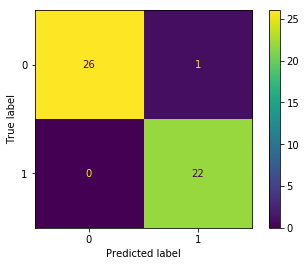

In [86]:
cm_display= ConfusionMatrixDisplay(cm)
cm_display.plot()

In [87]:
accuracy_score(y_test,y_pred)

0.9795918367346939

In [88]:
precision_score(y_test,y_pred)

0.9565217391304348

In [89]:
recall_score(y_test,y_pred)

1.0

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.96      1.00      0.98        22

    accuracy                           0.98        49
   macro avg       0.98      0.98      0.98        49
weighted avg       0.98      0.98      0.98        49



####  The choice of the algorithm depends on the penalty chosen: Supported penalties by solver:
‘liblinear’ - [‘l1’, ‘l2’]

‘saga’ - [‘l1’, ‘l2’, ‘elasticnet’, ‘none’]

‘lbfgs’ - [‘l2’, ‘none’]

‘newton-cg’ - [‘l2’, ‘none’]

‘sag’ - [‘l2’, ‘none’]

In [91]:
log_liblinear = LogisticRegression(solver='liblinear')
log_liblinear.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [92]:
log_liblinear.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [93]:
y_pred_liblinear = log_liblinear.predict(X_test)

In [94]:
confusion_matrix(y_test, y_pred_liblinear)

array([[25,  2],
       [ 0, 22]], dtype=int64)

In [95]:
accuracy_score(y_test, y_pred_liblinear)

0.9591836734693877

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [97]:
dt_model = DecisionTreeClassifier()

In [98]:
dt_model = dt_model.fit(X_train, y_train)

In [99]:
dt_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [100]:
y_pred_dt = dt_model.predict(X_test)

In [101]:
confusion_matrix(y_test, y_pred_dt)

# DT Seems to be overfitted 

array([[27,  0],
       [ 1, 21]], dtype=int64)

In [102]:
accuracy_score(y_test, y_pred_dt)

0.9795918367346939

In [103]:
rf_model = RandomForestClassifier()

In [104]:
rf_model = rf_model.fit(X_train, y_train)

In [105]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [106]:
y_pred_rf = rf_model.predict(X_test)

In [107]:
y_pred_rf

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0])

In [108]:
confusion_matrix(y_test, y_pred_rf)

array([[27,  0],
       [ 0, 22]], dtype=int64)

In [109]:
accuracy_score(y_test, y_pred_rf)

1.0

In [110]:
pickle.dump(log_model, open('Algerian_log_model.pkl','wb'))
pickle.dump(log_liblinear, open('Algerian_liblinear_model.pkl','wb'))
pickle.dump(rf_model, open('Algerian_rf_model.pkl','wb'))
